### Portfolio Selection
--------------------------------------------

**Notice**:
Due to differences in companies' lifespan, some time could be removed.
To see the full time series of a company -since the time it became public-, run the code with only that company, or with companies with about the  same life span.


In [ ]:
tickers = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'SOL-USD']
time = 'max' # 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
interval = '1d' # 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
time_span = 100 # Last n 'intervals' to analyse
treasury_bond_percent = 0.06

### Notebook Initialization
--------------------------------------------

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 849.2 kB/s eta 0:00:00


In [ ]:
import mplfinance
import datetime as dt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

DATA = {}

for ticker in tickers:
  request = yf.download(ticker, period=time, interval=interval)

  DATA[ticker] = request

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Graphic and statistical exploration of data
--------------------------------------------

In [ ]:
df = pd.DataFrame()

for ticker in tickers:
  df[ticker] = DATA[ticker]['Close']

df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

df.dropna(inplace=True, axis=0)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(-200.0, 0, '2023-06-21'),
  Text(0.0, 0, '2020-04-10'),
  Text(200.0, 0, '2020-10-27'),
  Text(400.0, 0, '2021-05-15'),
  Text(600.0, 0, '2021-12-01'),
  Text(800.0, 0, '2022-06-19'),
  Text(1000.0, 0, '2023-01-05'),
  Text(1200.0, 0, '2023-07-24'),
  Text(1400.0, 0, ''),
  Text(1600.0, 0, '')])

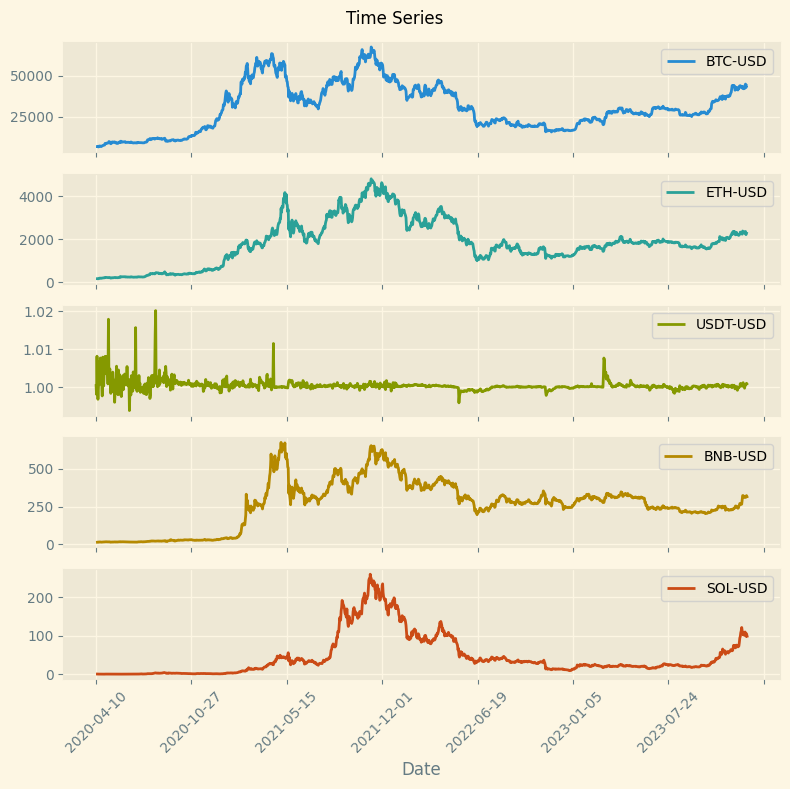

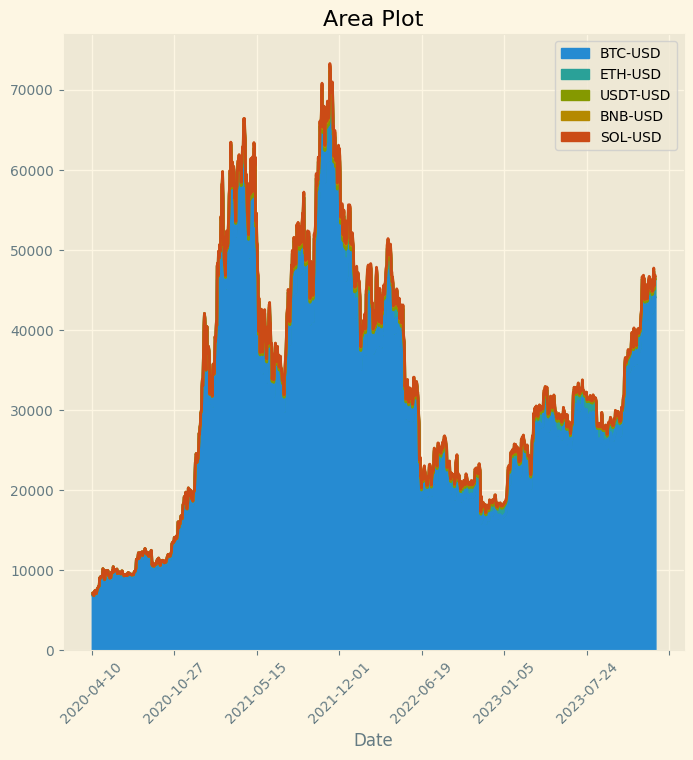

In [ ]:
plt.style.use("Solarize_Light2") # Change Graphs' Theme

df.plot(subplots=True, title="Time Series", figsize=(8,8))
plt.xticks(rotation=45)
plt.tight_layout()

df.plot(kind='area', figsize=(8,8))
plt.title("Area Plot")
plt.xticks(rotation=45)


In [ ]:
df.describe()

,BTC-USD,ETH-USD,USDT-USD,BNB-USD,SOL-USD
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,30474.127707,1830.906946,1.000463,264.658366,45.463256
std,14526.688455,1061.963549,0.001492,158.877851,53.992280
min,6642.109863,153.286896,0.993829,13.737724,0.515273
25%,19364.238281,1226.261414,1.000018,212.309433,13.030772
50%,28627.574219,1772.785645,1.000223,277.961426,24.688747
75%,41306.244141,2356.708008,1.000601,343.927505,48.287989
max,67566.828125,4812.087402,1.020210,675.684082,258.934326


<Axes: >

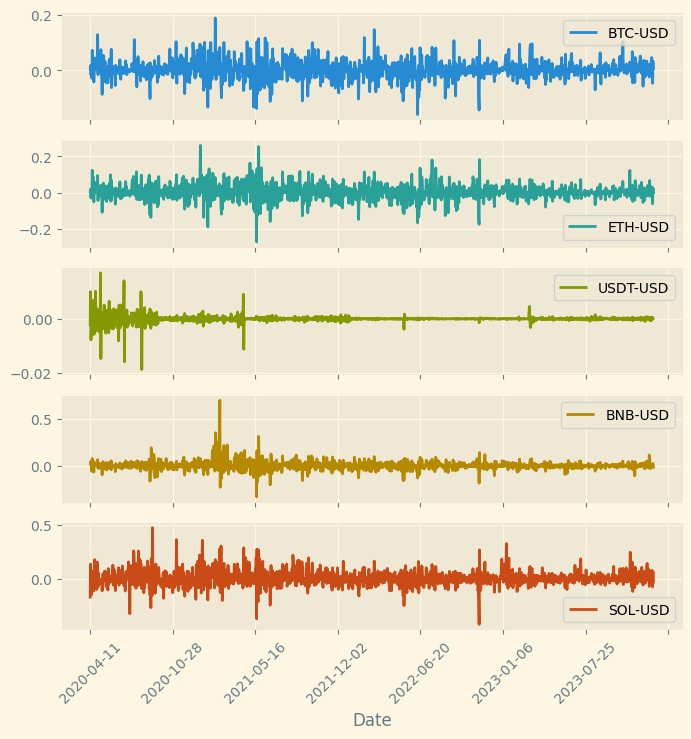

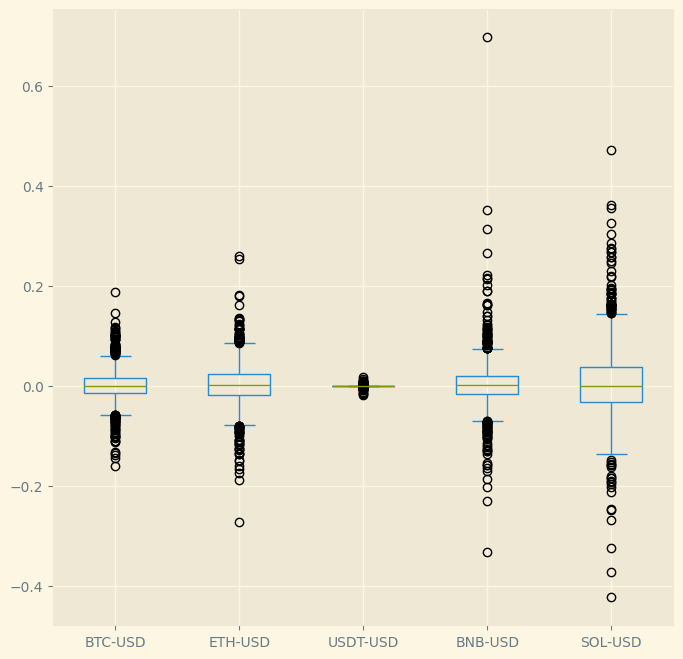

In [ ]:
df_returns = df.pct_change().dropna(axis=0)
df_returns.plot(subplots=True, figsize=(8,8))
plt.xticks(rotation=45)

df_returns.plot(kind='box', figsize=(8,8))

In [ ]:
df_returns.describe()

,BTC-USD,ETH-USD,USDT-USD,BNB-USD,SOL-USD
count,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,0.001903,0.002875,0.000001,0.003431,0.006003
std,0.032904,0.043099,0.001575,0.049264,0.072892
min,-0.159747,-0.272003,-0.018806,-0.332656,-0.422809
25%,-0.013140,-0.017170,-0.000196,-0.015416,-0.032768
50%,0.000663,0.001552,-0.000004,0.001411,-0.000189
75%,0.016529,0.024197,0.000170,0.020907,0.038661
max,0.187465,0.259475,0.017060,0.697604,0.472828


### Technical Indicators
--------------------------------------------

### **MACD**

In [ ]:
def MACD(df, stock, a=12, b=26, c=9,):
  df_copy = df.copy()
  df_copy['ma_fast_' + stock] = df_copy[stock].ewm(span=a, min_periods=a).mean()
  df_copy['ma_slow_' + stock] = df_copy[stock].ewm(span=b, min_periods=b).mean()
  df_copy['macd_' + stock] = df_copy['ma_fast_' + stock] - df_copy['ma_slow_' + stock]
  df_copy['signal_' + stock] = df_copy['macd_' + stock].ewm(span=c, min_periods=c).mean()

  df['macd_' + stock] = df_copy['ma_fast_' + stock] - df_copy['ma_slow_' + stock]
  df['signal_' + stock] = df['macd_' + stock].ewm(span=c, min_periods=c).mean()

  return df

In [ ]:
for column in df.columns:
  df = MACD(df, column)

df.dropna(axis=0, inplace=True)
df.head()

,BTC-USD,ETH-USD,USDT-USD,BNB-USD,SOL-USD,macd_BTC-USD,signal_BTC-USD,macd_ETH-USD,signal_ETH-USD,macd_USDT-USD,signal_USDT-USD,macd_BNB-USD,signal_BNB-USD,macd_SOL-USD,signal_SOL-USD
Date,,,,,,,,,,,,,,,
2020-05-13,9269.987305,199.193283,1.000232,16.138878,0.550532,343.494545,406.982533,1.857516,4.117105,-0.000734,-0.000105,-0.045237,0.101338,-0.030343,-0.021330
2020-05-14,9733.721680,202.949097,0.998860,16.357800,0.569118,372.623966,399.284220,1.969007,3.635806,-0.000973,-0.000299,-0.036530,0.070447,-0.029518,-0.023165
2020-05-15,9328.197266,195.622665,1.003972,15.754374,0.559752,360.623652,390.825508,1.482596,3.164696,-0.000764,-0.000401,-0.074677,0.038695,-0.029236,-0.024493
2020-05-16,9377.013672,200.677124,1.000194,16.051781,0.599120,350.773588,382.224035,1.466757,2.800050,-0.000877,-0.000503,-0.081199,0.012947,-0.025706,-0.024754
2020-05-17,9670.739258,207.158691,1.001590,16.314646,0.612989,361.309784,377.797853,1.929059,2.615718,-0.000849,-0.000576,-0.065434,-0.003641,-0.021597,-0.024086


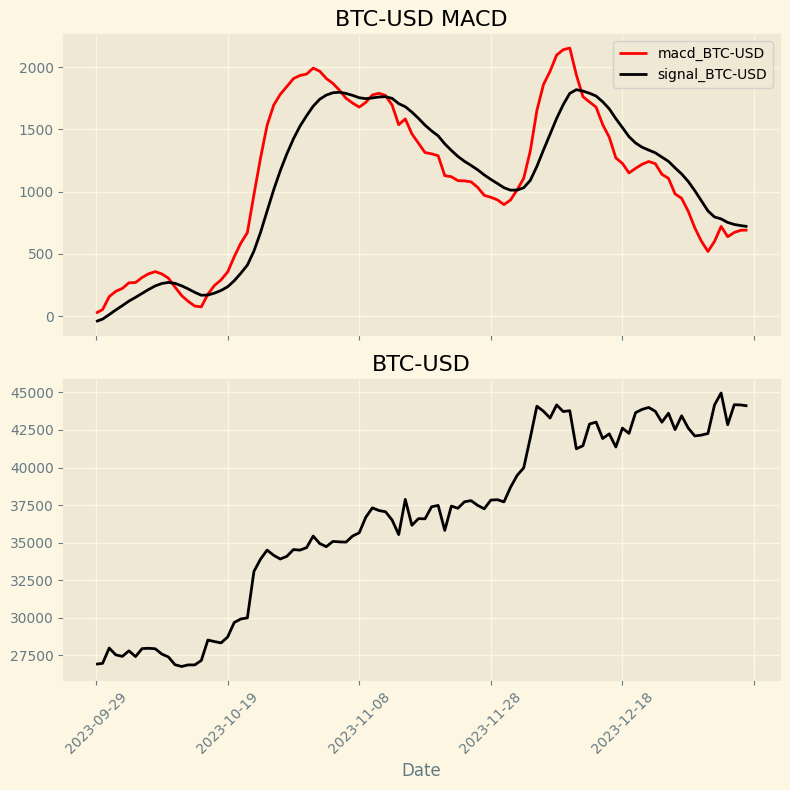

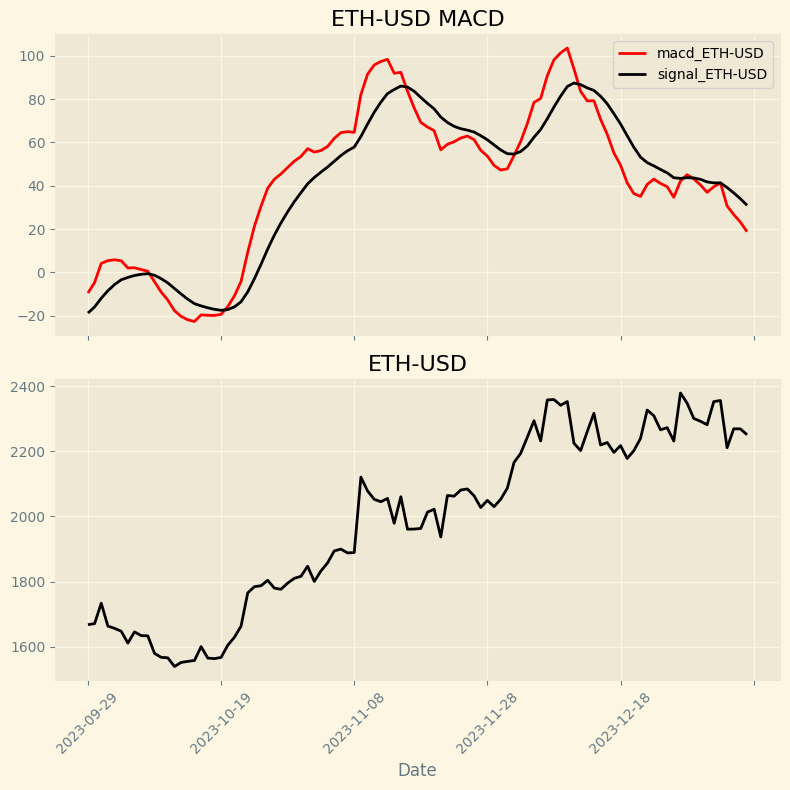

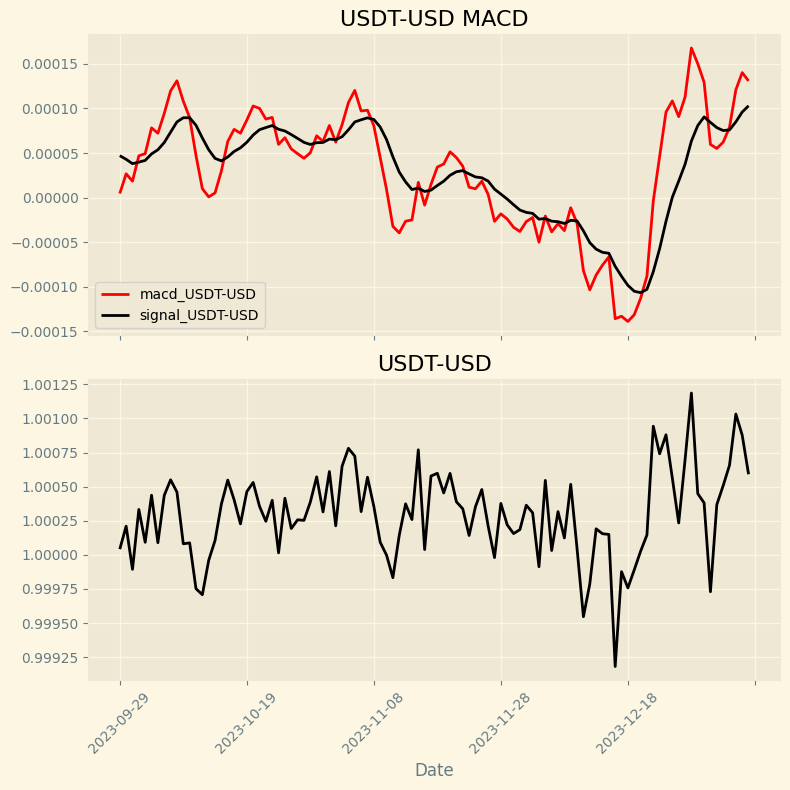

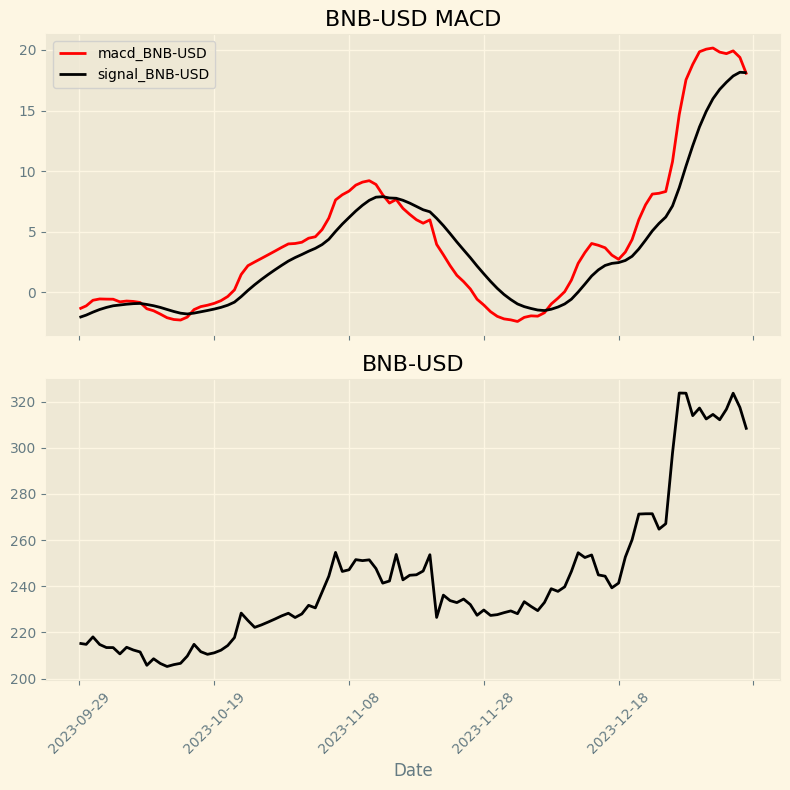

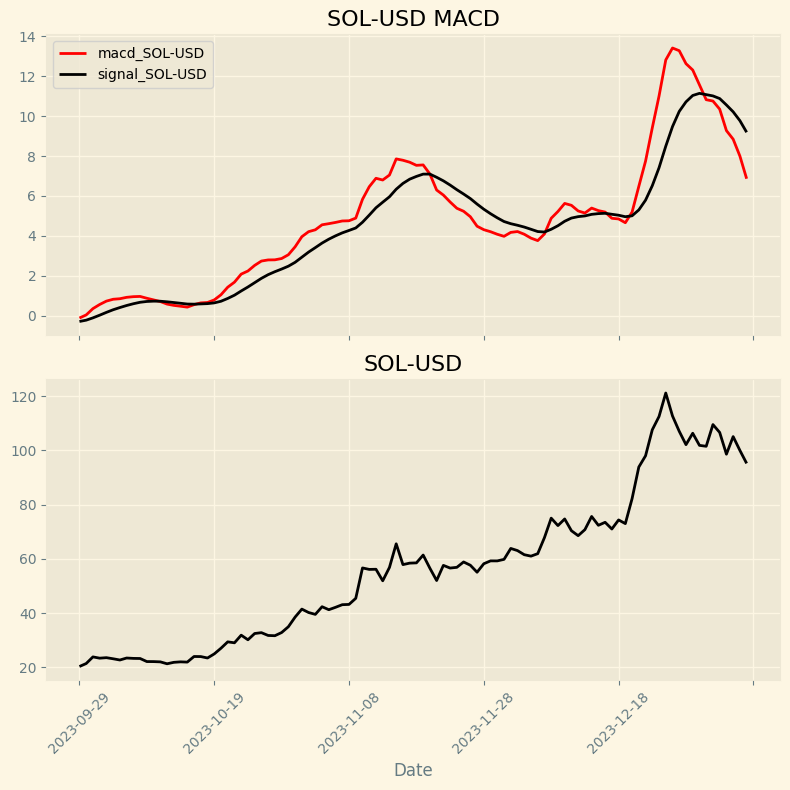

In [ ]:
step = len(tickers)
stock = 0

for i in range(len(tickers) + 2, len(df.columns) + 2, 2):
  fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,8))
  df[-time_span:][df.columns[step: i]].plot(color=['red', 'black'], ax=ax[0],
                                      title=f'{df.columns[stock]} MACD')
  df[-time_span:][df.columns[stock]].plot(color='black', ax=ax[1],
                                          title=f'{df.columns[stock]}')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
  step += 2
  stock += 1


### **ATR**


In [ ]:
df = pd.DataFrame()

for ticker in tickers:
  data_df = DATA[ticker][['High', 'Low', 'Close']]

  data_df = data_df.add_suffix('_' + ticker)
  df = pd.concat([df, data_df], axis=1)

df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

df.dropna(inplace=True, axis=0)

In [ ]:
def ATR(df, high, low, close, name, n=14):
  df_copy = df.copy()

  df_copy['high-low'] = df_copy[high] - df_copy[low]
  df_copy['H-PreClose'] = df_copy[high] - df[close].shift(1)
  df_copy['L-PreClose'] = df_copy[low] - df[close].shift(1)
  df_copy['TR'] = df_copy[['high-low', 'H-PreClose', 'L-PreClose']].max(axis=1,
                                                                   skipna=False)

  copy = df.copy()

  copy[name] = df_copy['TR'].ewm(com=n, min_periods=n).mean()

  return copy

In [ ]:
for ticker in tickers:
  df = ATR(df, high=f'High_{ticker}', low=f'Low_{ticker}', close=f'Close_{ticker}',
           name=f'ATR_{ticker}')

df.dropna(axis=0, inplace=True)

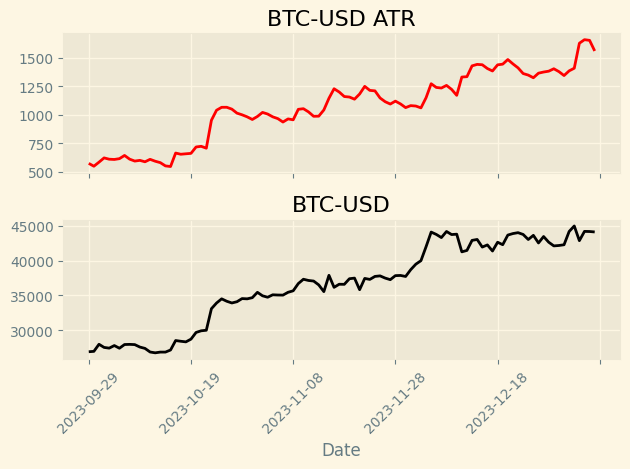

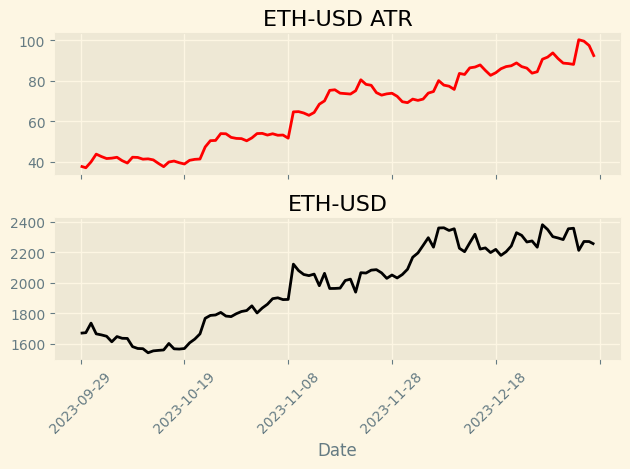

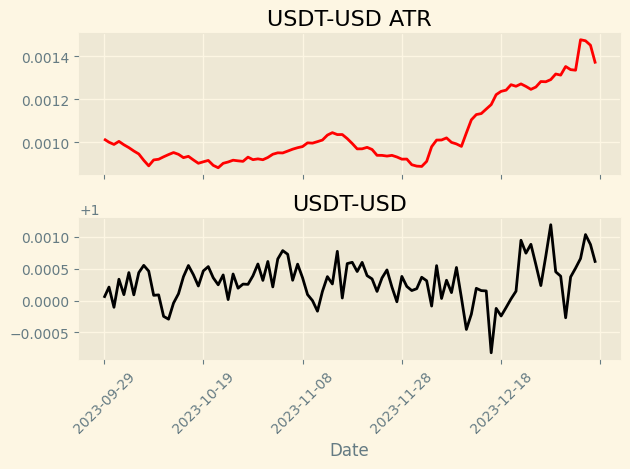

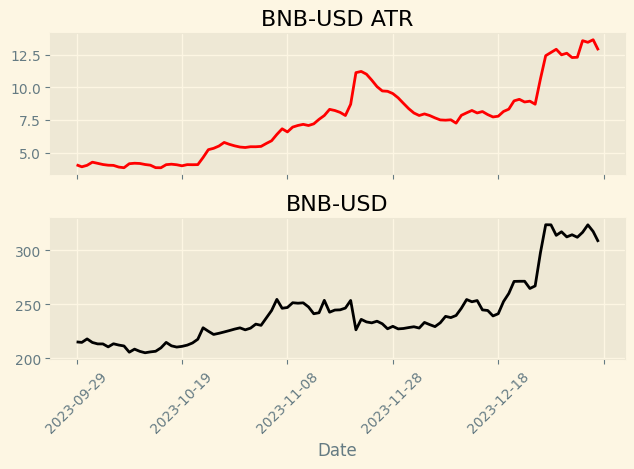

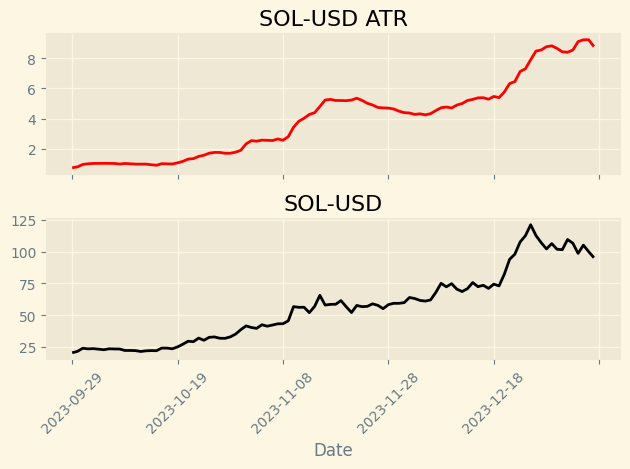

In [ ]:
step = 2

for i in range(len(tickers)):
  fig, ax = plt.subplots(2, 1, sharex=True)

  df[-time_span:][df.columns[3*len(tickers) + i]].plot(color='red', ax=ax[0],
                                                       title=f'{tickers[i]} ATR')

  df[-time_span:][df.columns[step]].plot(color='black', title=f'{tickers[i]}',
                                         ax=ax[1])

  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
  step += 3


### **Bollinger Band**

In [ ]:
df = pd.DataFrame()

for ticker in tickers:
  df[ticker] = DATA[ticker]['Close']

df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

df.dropna(inplace=True, axis=0)

In [ ]:
def Bollinger_Band(df, stock, n=14):
  df['middle_band_' + stock] = df[stock].rolling(n).mean()
  df['upper_band_' + stock] = df['middle_band_' + stock] + 2*df[stock].rolling(n).std(ddof=0)
  df['lower_band_' + stock] = df['middle_band_' + stock] - 2*df[stock].rolling(n).std(ddof=0)

  return df

In [ ]:
for ticker in tickers:
  df = Bollinger_Band(df, stock=ticker)
  df.dropna(inplace=True, axis=0)

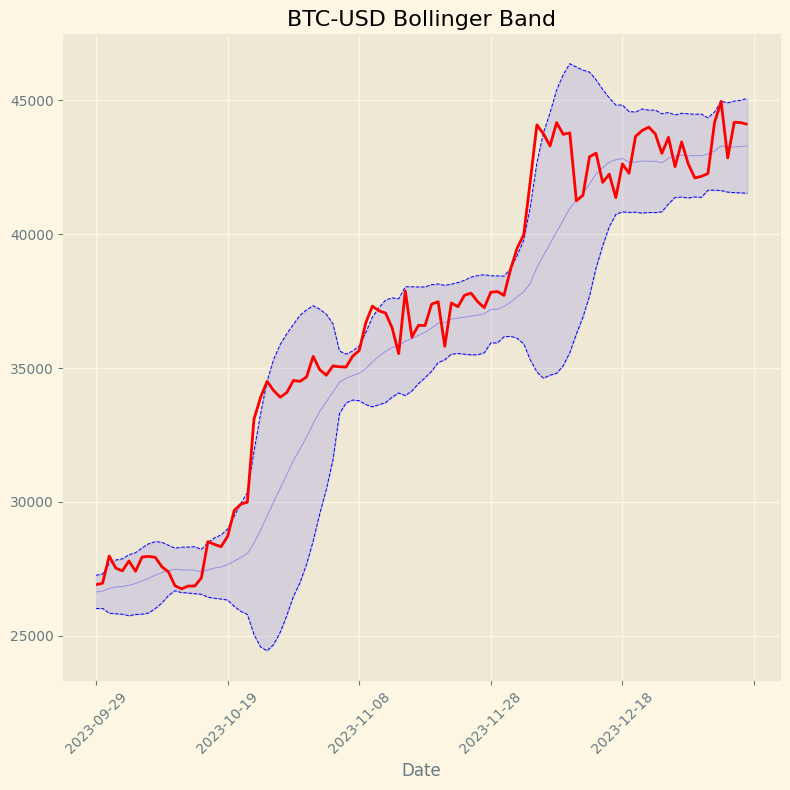

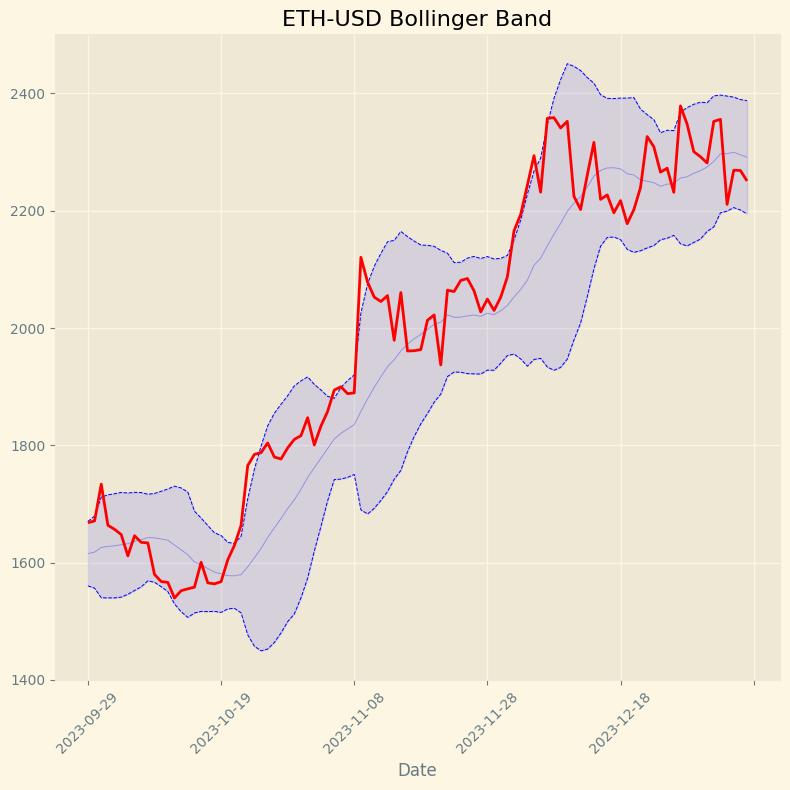

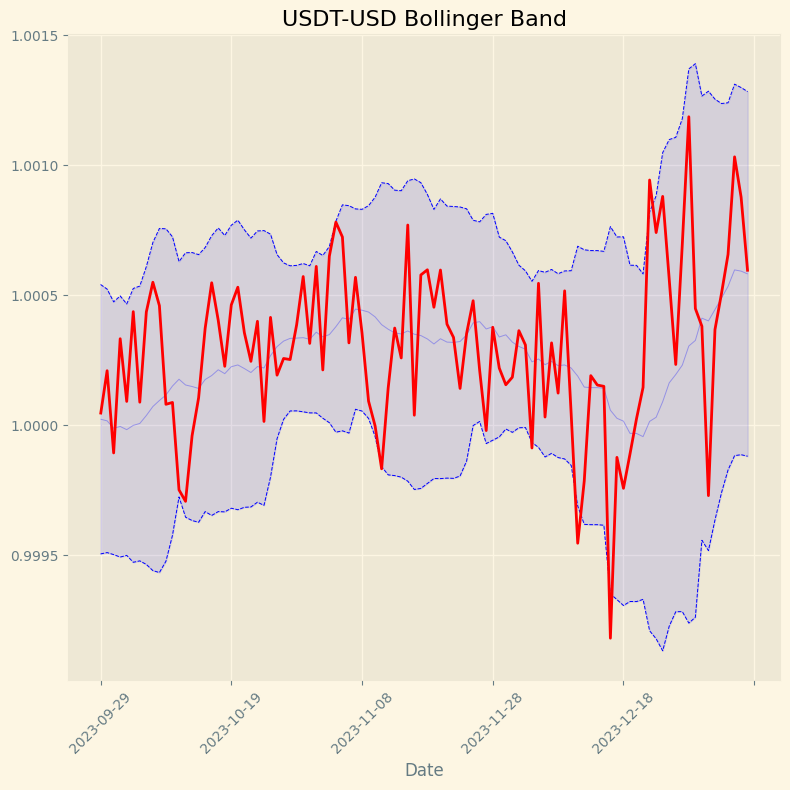

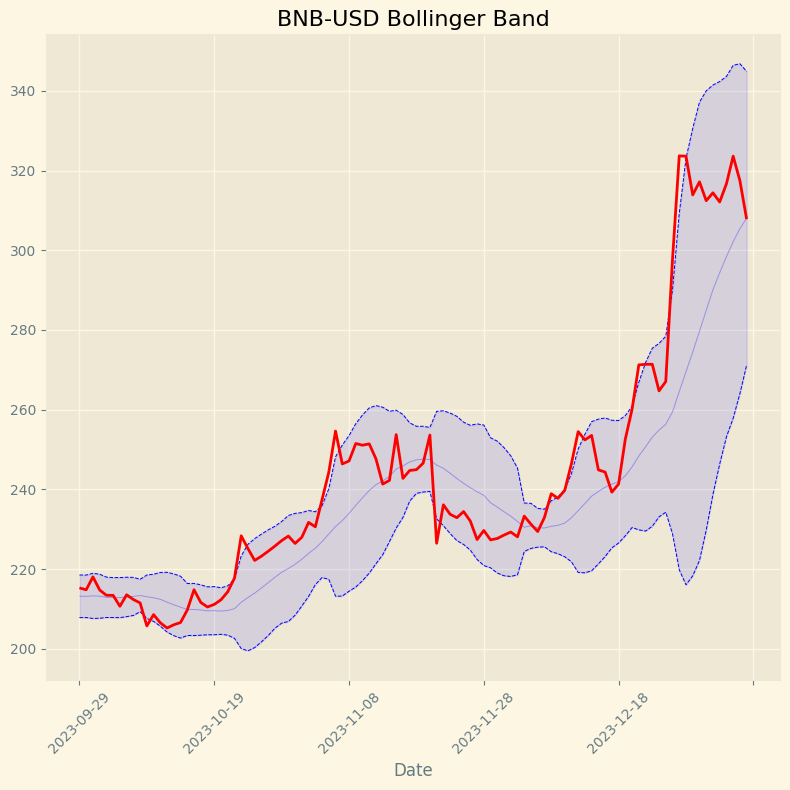

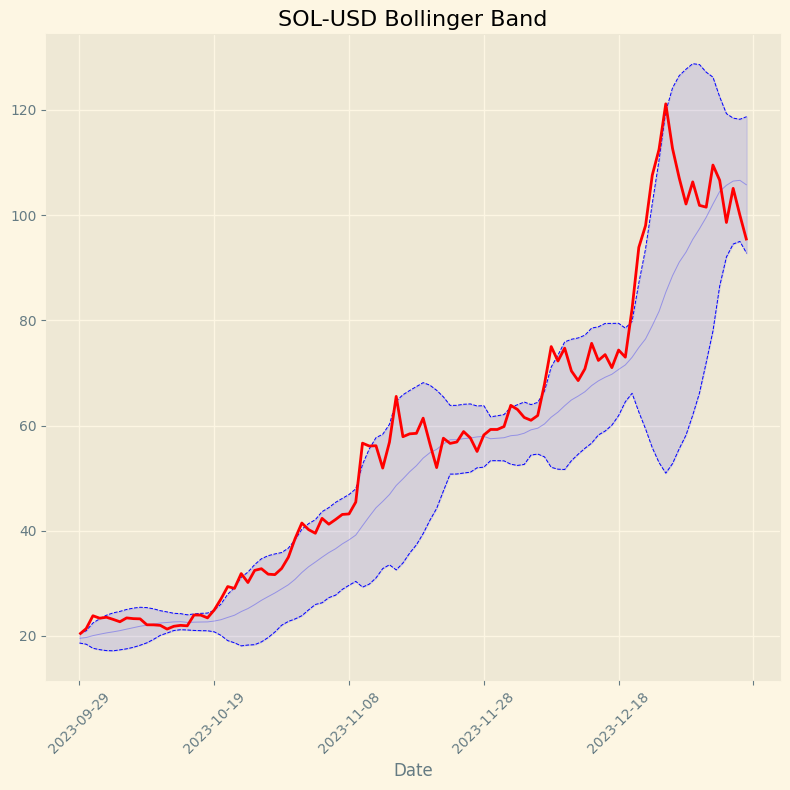

In [ ]:
step = 0

d = df.index.values[-time_span:]

for i in range(len(tickers), 3*len(tickers) + 3, 3):

  df[-time_span:][df.columns[i+1:i+3]].plot(color=['blue', 'blue'], linestyle='dashed',
                                            title=f'{tickers[step]} Bollinger Band',
                                            figsize=(8,8), legend=False,
                                            linewidth= 0.7)

  df[-time_span:][df.columns[i]].plot(color='blue', alpha=0.3, linewidth= 0.7)

  plt.fill_between(d, df.iloc[-time_span:, i+1], df.iloc[-time_span:, i+2], alpha=0.1,
                   where=df.iloc[-time_span:, i+1] >= df.iloc[-time_span:, i+2],
                   color='blue')

  df[-time_span:][df.columns[step]].plot(color='red')

  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
  step += 1


### **RSI**

In [ ]:
df = pd.DataFrame()

for ticker in tickers:
  df['Close_' + ticker] = DATA[ticker]['Close']

df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

df.dropna(inplace=True, axis=0)

In [ ]:
def RSI(df, stock, n=14):
  df_copy = df.copy()
  df_copy['change_' + stock] = df_copy['Close_' + stock] - df_copy['Close_' + stock].shift(1)
  df_copy['gain_' + stock] = np.where(df_copy['change_' + stock] >= 0, df_copy['change_' + stock], 0)
  df_copy['loss_' + stock] = np.where(df_copy['change_' + stock] < 0, -1 * df_copy['change_' + stock], 0)
  df_copy['avg_gain_' + stock] = df_copy['gain_' + stock].ewm(alpha=1/n, min_periods=n).mean()
  df_copy['avg_loss_' + stock] = df_copy['loss_' + stock].ewm(alpha=1/n, min_periods=n).mean()
  df_copy['rs_' + stock] = df_copy['avg_gain_' + stock] / df_copy['avg_loss_' + stock]

  df['rsi_' + stock] = 100 - (100/(1+df_copy['rs_' + stock]))

  return df

In [ ]:
for ticker in tickers:
  df = RSI(df, stock=ticker)
  df.dropna(inplace=True, axis=0)

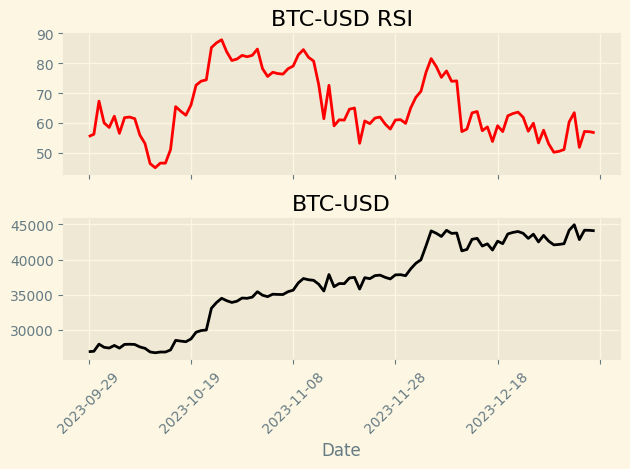

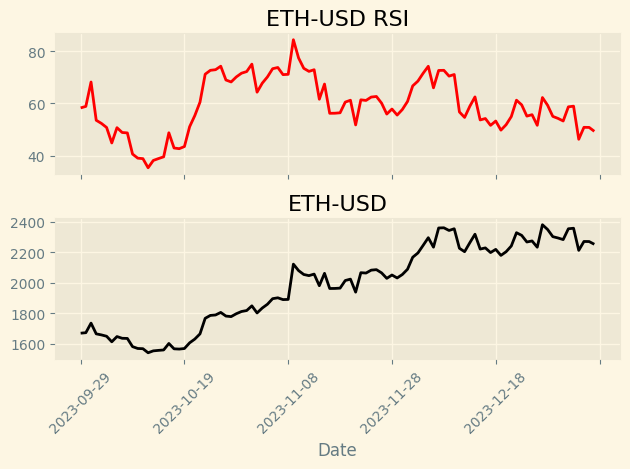

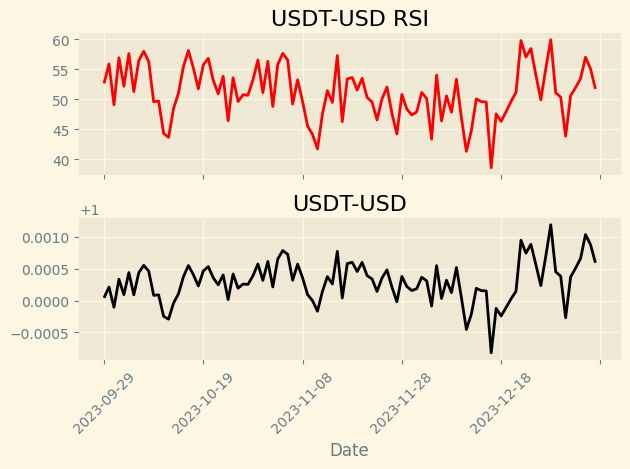

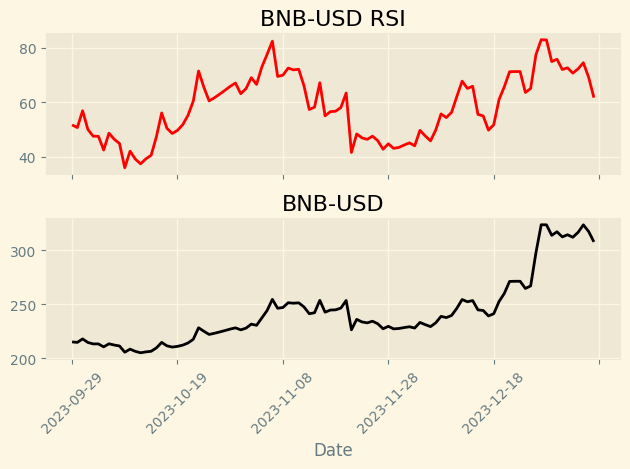

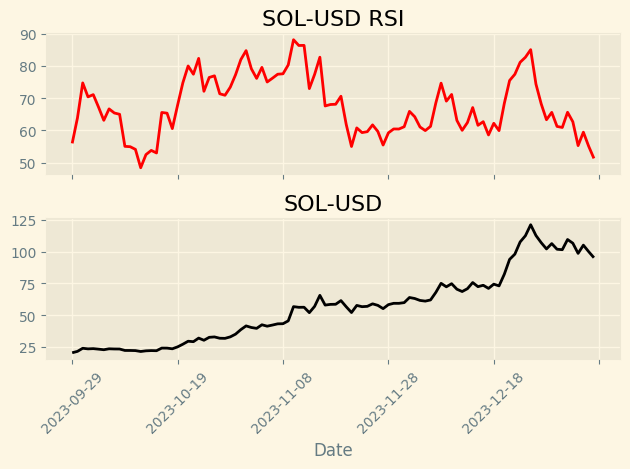

In [ ]:
for i in range(len(tickers)):
  fig, ax = plt.subplots(2, 1, sharex=True)

  df[-time_span:][df.columns[len(tickers) + i]].plot(color='red', ax=ax[0],
                                                       title=f'{tickers[i]} RSI')

  df[-time_span:][df.columns[i]].plot(color='black', title=f'{tickers[i]}',
                                         ax=ax[1])

  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

### **ADX**

In [ ]:
df = pd.DataFrame()

for ticker in tickers:
  data_df = DATA[ticker][['High', 'Low', 'Close']]

  data_df = data_df.add_suffix('_' + ticker)
  df = pd.concat([df, data_df], axis=1)

df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

df.dropna(inplace=True, axis=0)

In [ ]:
def ADX(df, stock, n=20):
  df_copy = ATR(df, high='High_' + stock, close = 'Close_' + stock,
                name = 'ATR_' + stock, low = 'Low_' + stock)

  df_copy['upmove_' + stock] = df_copy['High_' + stock] - df_copy['High_' + stock].shift(1)

  df_copy['downmove_' + stock] = df_copy['Low_' + stock].shift(1) - df_copy['Low_' + stock]

  df_copy['pos_DM' + stock] = np.where((df_copy['upmove_' + stock] > df_copy['downmove_' + stock])
                            & (df_copy['upmove_' + stock] > 0),
                                    df_copy['upmove_' + stock], 0)

  df_copy['neg_DM' + stock] = np.where((df_copy['downmove_' + stock] > df_copy['upmove_' + stock])
                            & (df_copy['downmove_' + stock] > 0),
                                    df_copy['downmove_' + stock], 0)

  df_copy['pos_DI' + stock] = 100 * (df_copy['pos_DM' + stock] / df_copy['ATR_' + stock]).ewm(
      com=n, min_periods=n).mean()

  df_copy['neg_DI' + stock] = 100 * (df_copy['neg_DM' + stock] / df_copy['ATR_' + stock]).ewm(
      com=n, min_periods=n).mean()

  copy = df.copy()

  copy['ADX_' + stock] = 100 * abs((df_copy['pos_DI' + stock] - df_copy['neg_DI' + stock]) /
                           (df_copy['pos_DI' + stock] + df_copy['neg_DI' + stock])).ewm(
                            com=n, min_periods=n).mean()
  return copy


In [ ]:
for ticker in tickers:
  df = ADX(df, stock=ticker)
  df.dropna(inplace=True, axis=0)

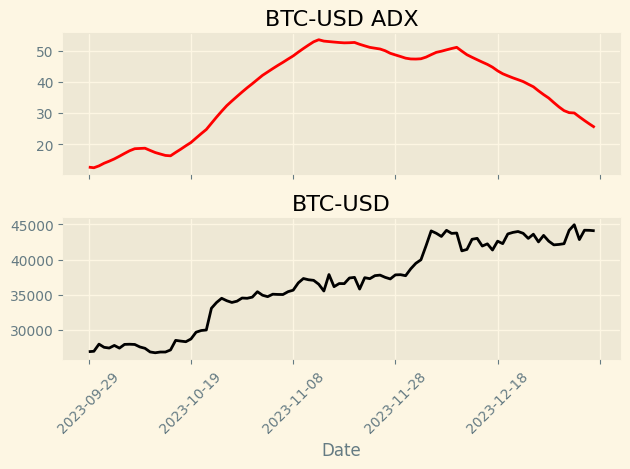

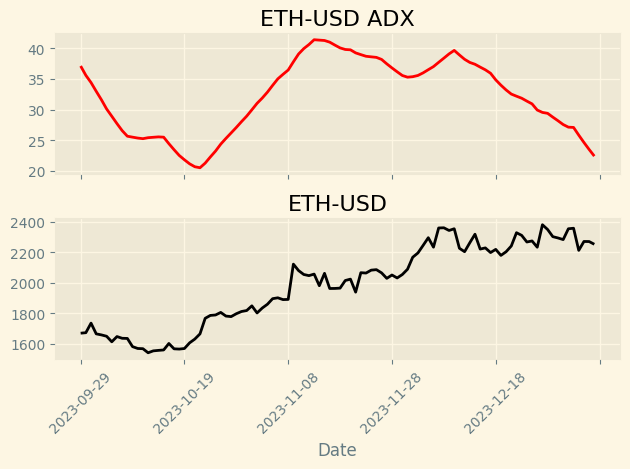

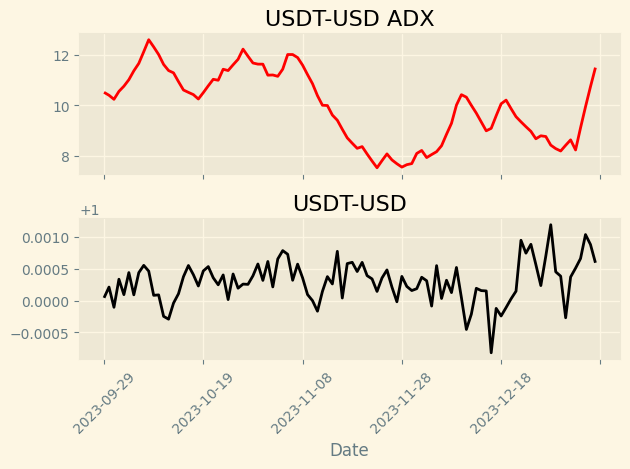

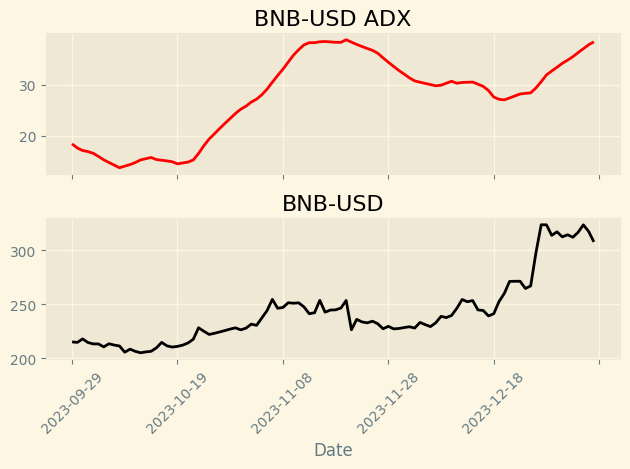

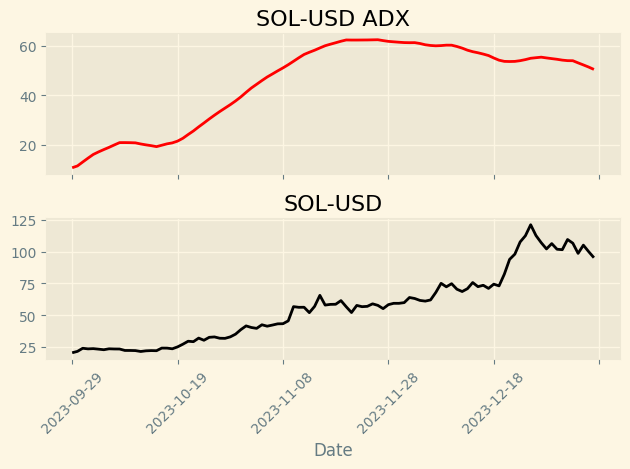

In [ ]:
step = 2
name_step = 0

for i in range(3 * len(tickers), 3 * len(tickers) + len(tickers)):
  fig, ax = plt.subplots(2, 1, sharex=True)

  df[-time_span:][df.columns[i]].plot(color='red', ax=ax[0],
                                      title=f'{tickers[name_step]} ADX')

  df[-time_span:][df.columns[step]].plot(color='black', title=f'{tickers[name_step]}',
                                         ax=ax[1])

  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
  step += 3
  name_step += 1


### **Renko Chart**
**Notice**: To avoid any plotting errors, Renko Charts can only be made with the full time series. **Always consider the X axis when analyzing the charts.**

In [ ]:
def ATR_Renko(DF, n):
  df = DF.copy()
  df['H-L'] = abs(df['High'] - df['Low'])
  df['H-PC'] = abs(df['High'] - df['Adj Close'].shift(1))
  df['L-PC'] = abs(df['Low'] - df['Adj Close'].shift(1))
  df['TR'] = df[['H-L','H-PC','L-PC']].max(axis =1, skipna = False)
  df['ATR'] = df['TR'].rolling(n).mean()
  df = df.drop(['H-L','H-PC','L-PC'], axis =1)
  df.dropna(inplace = True)
  return df

In [ ]:
def Renko(df, stock):
  df_copy = ATR_Renko(df, 50)

  clone = pd.DataFrame()

  clone['ATR'] = df_copy.iloc[:, -1:]

  bricks = round(ATR_Renko(df, 50)["ATR"][-1],0)

  clone.dropna(inplace=True, axis=0)

  plot = mplfinance.plot(df, type='renko', renko_params=dict(brick_size=bricks,
                                                                 atr_length=14),
                         style='yahoo',figsize =(18,7), title = f'Renko Chart {stock}' +
                         f' | Brick value: {int(bricks)}')

  return plot

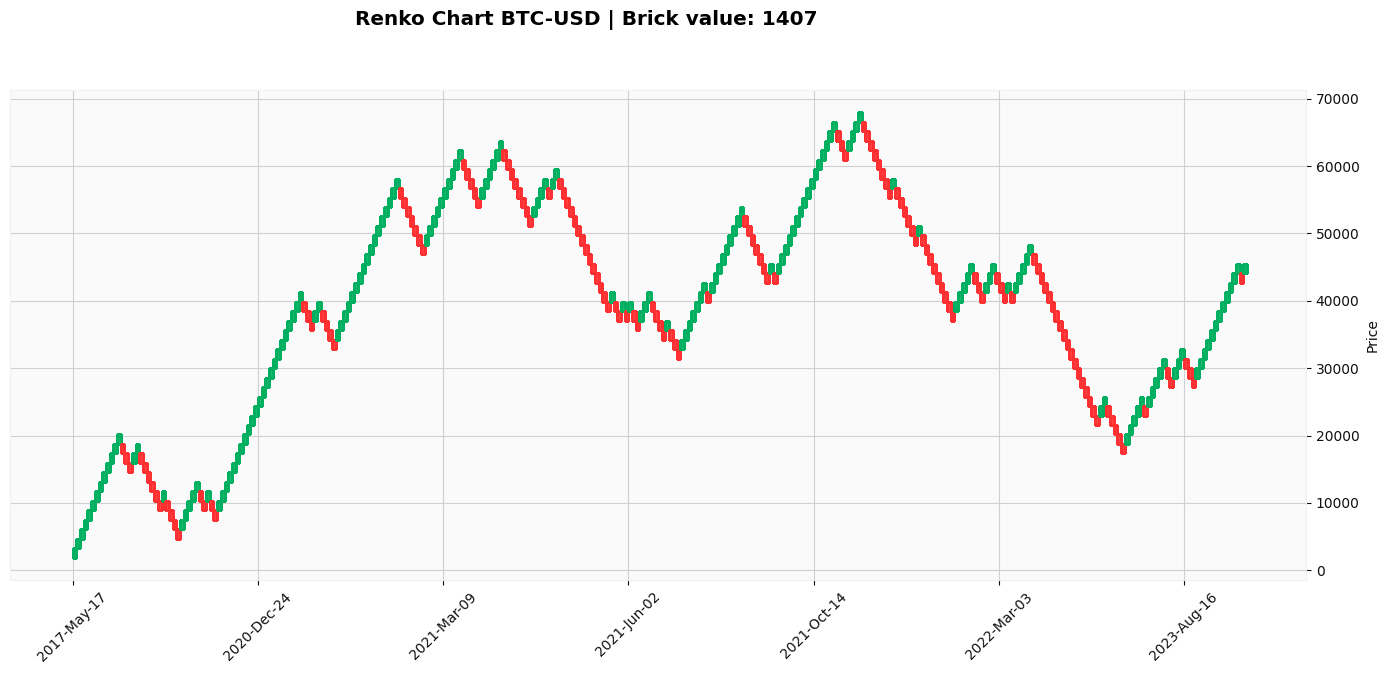

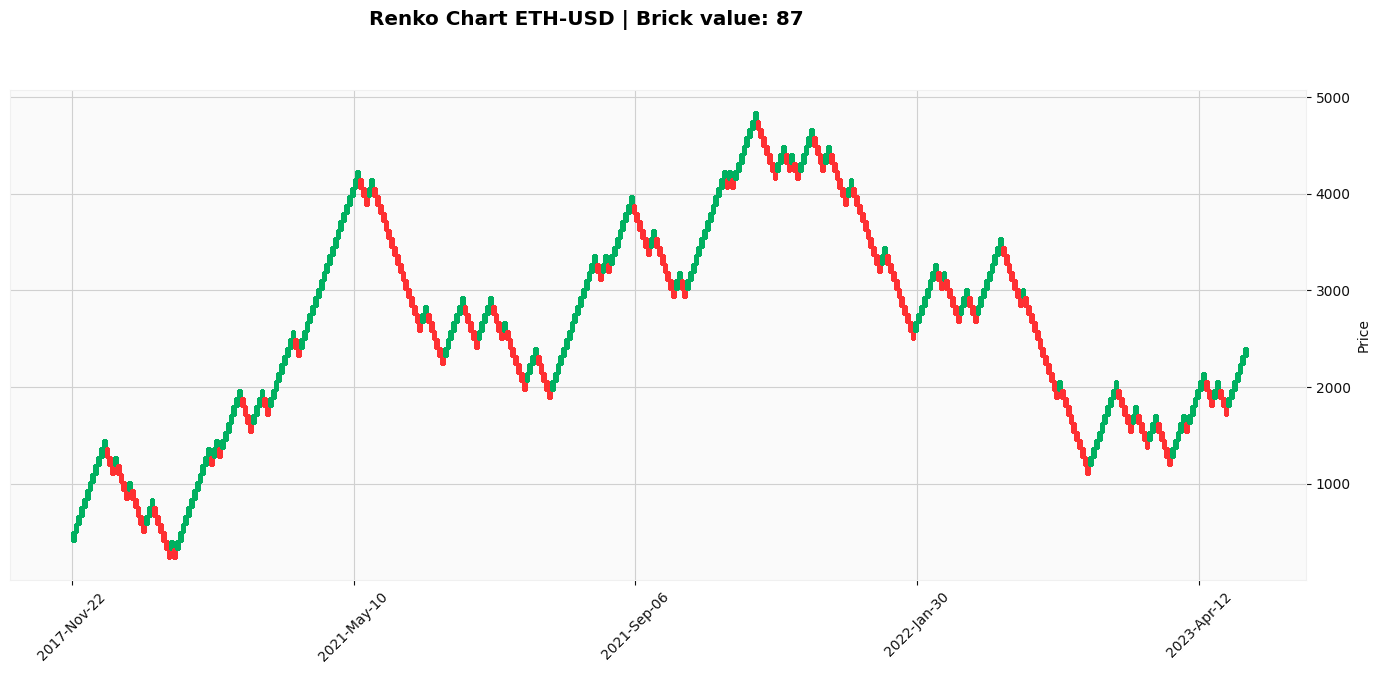


 --*--*--*--*--*-- 
 --*--*--*--*--*-- 
 --*--*--*--*--*-- 
  USDT-USD cannot be plotted. Brick Value might be too small.
 --*--*--*--*--*-- 
 --*--*--*--*--*-- 
 --*--*--*--*--*--


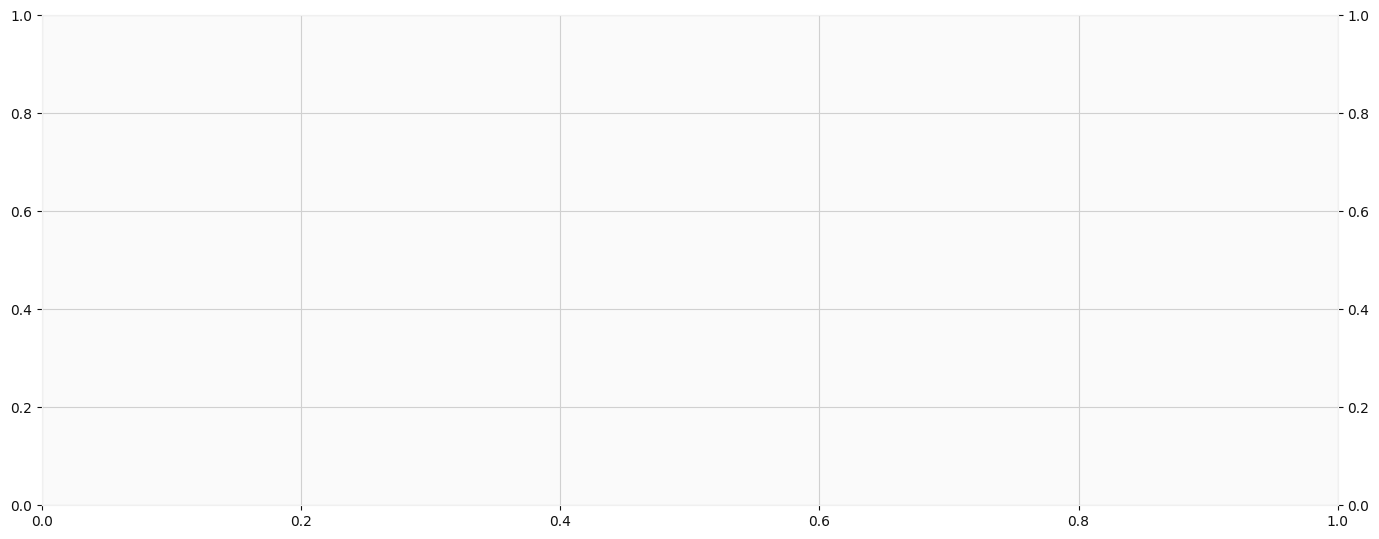

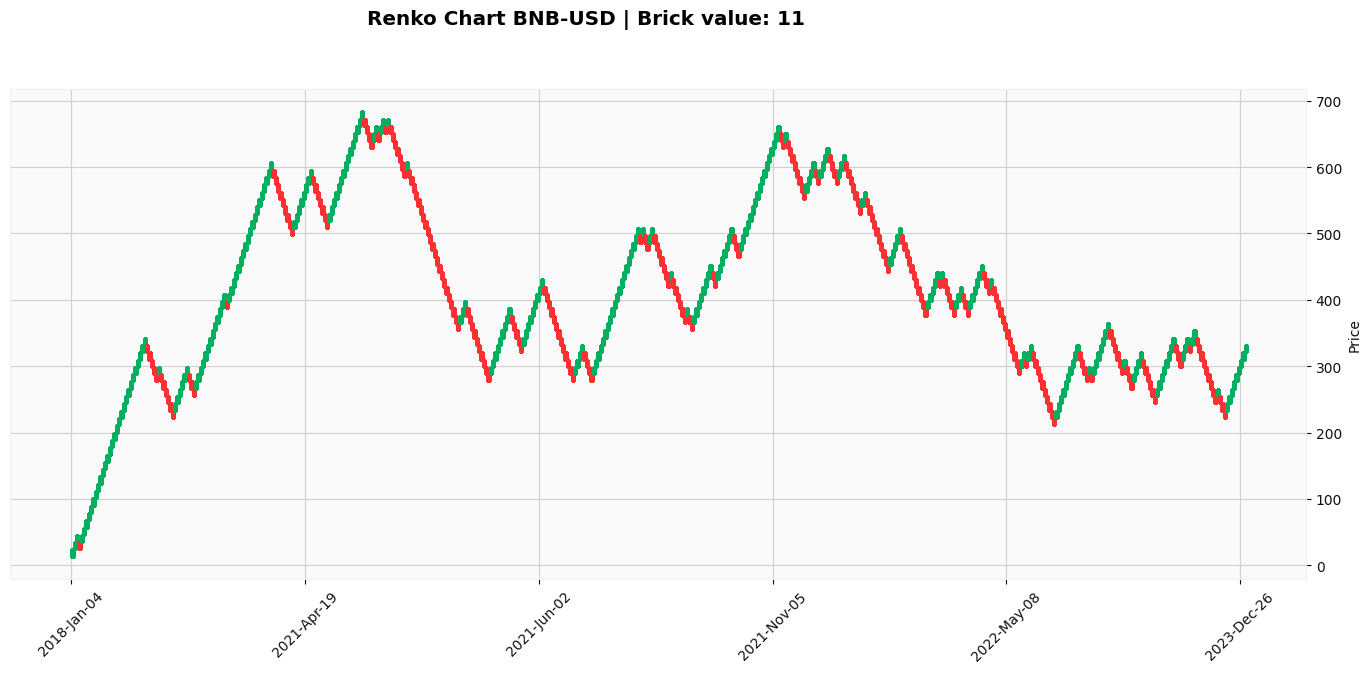

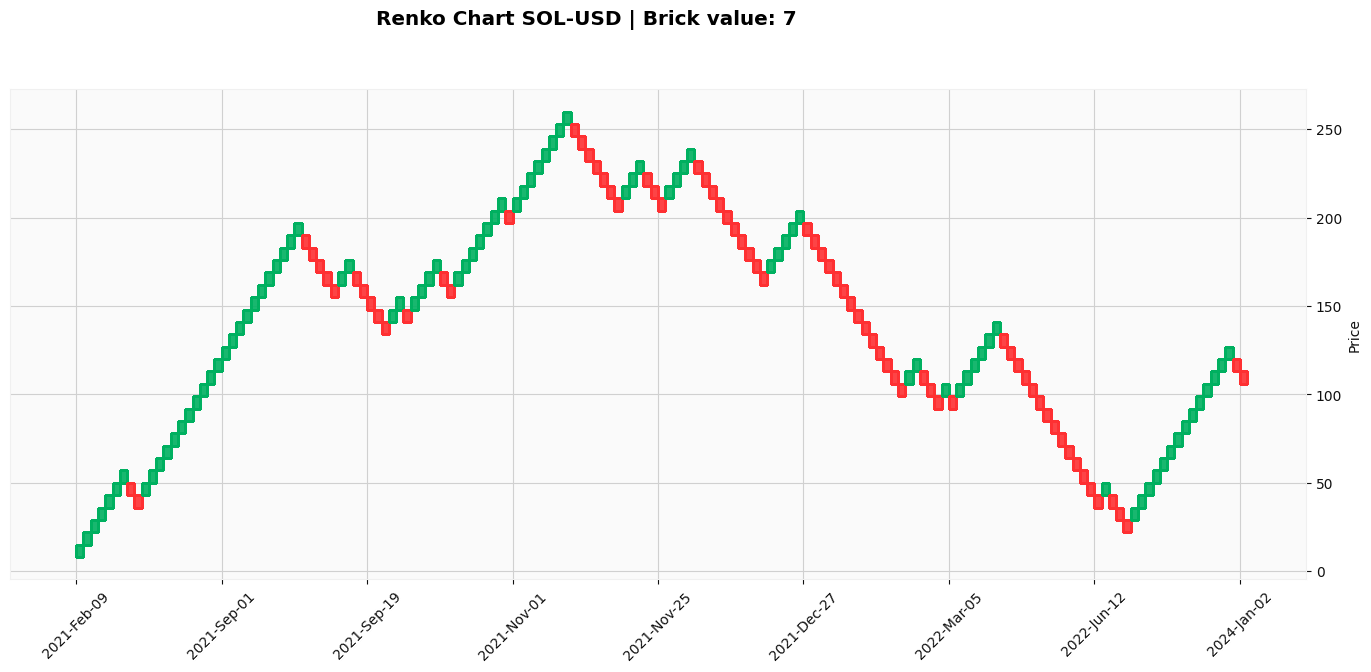

In [ ]:
DF = pd.DataFrame()
for ticker in tickers:

  try:
    DF = DATA[ticker][['Open', 'High', 'Low', 'Close', 'Close', 'Volume']]

    DF.columns.values[4] = "Adj Close"

    DF.dropna(inplace=True, axis=0)

    Renko(DF, stock=ticker)

    plt.show()

  except:
    print('\n --*--*--*--*--*-- \n --*--*--*--*--*-- \n --*--*--*--*--*-- \n ' +
          f' {ticker} cannot be plotted. Brick Value might be too small.' +
          '\n --*--*--*--*--*-- \n --*--*--*--*--*-- \n --*--*--*--*--*--')



### Performance Measurement
--------------------------------------------------------------------------------

### **Compounded Annual Growth Rate (CAGR)**
**Notice**: Compounded Annual Growth Rate formula is only working for daily data. Do not trust it with any other interval.

In [ ]:
plt.style.use("Solarize_Light2") # Change Graphs' Theme
df = pd.DataFrame()

for ticker in tickers:
  df[ticker] = DATA[ticker]['Close']

df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

df.dropna(inplace=True, axis=0)

In [ ]:
def CAGR(df, stock):
  df_copy = df.copy()
  df_copy['return'] = df_copy[stock].pct_change()
  df_copy['cummulative_return'] = (1 + df_copy['return']).cumprod()
  n = len(df)/252
  cagr = (df_copy['cummulative_return'][-1:]) ** (1/n) - 1

  return cagr

(array([0]), [Text(0, 0, '2024-01-07')])

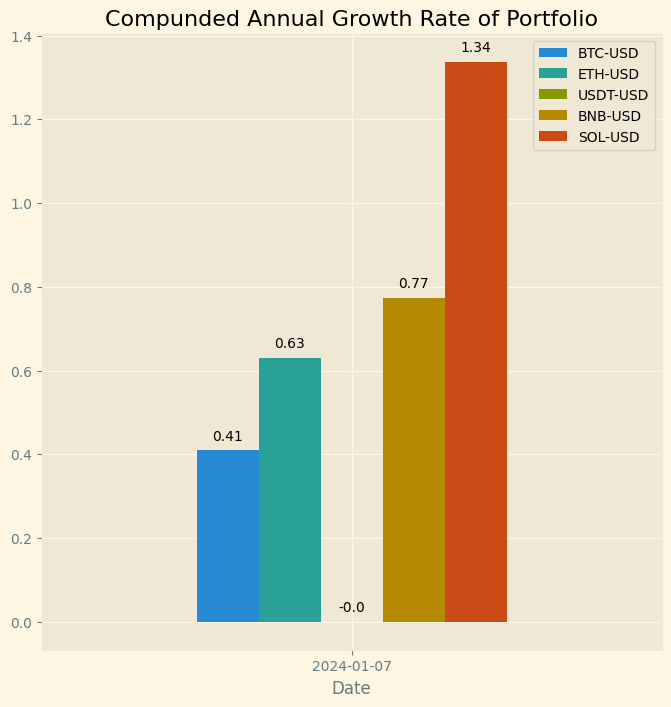

In [ ]:
df_cagr = pd.DataFrame()

for ticker in tickers:
  df_cagr[ticker] = CAGR(df, ticker)

ax = df_cagr.plot(kind='bar', title = 'Compunded Annual Growth Rate of Portfolio',
             figsize=(8,8))

for p in ax.patches:
    ax.annotate(text=np.round(p.get_height(), decimals=2),
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=0)

### **Annualized Volatility**

In [ ]:
df = pd.DataFrame()

for ticker in tickers:
  df[ticker] = DATA[ticker]['Close']

df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

df.dropna(inplace=True, axis=0)


In [ ]:
std_df = pd.DataFrame()
for ticker in tickers:
  df['return' + ticker] = df[ticker].pct_change()
  std_df[ticker] = [df['return' + ticker].std() * np.sqrt(252)]

([], [])

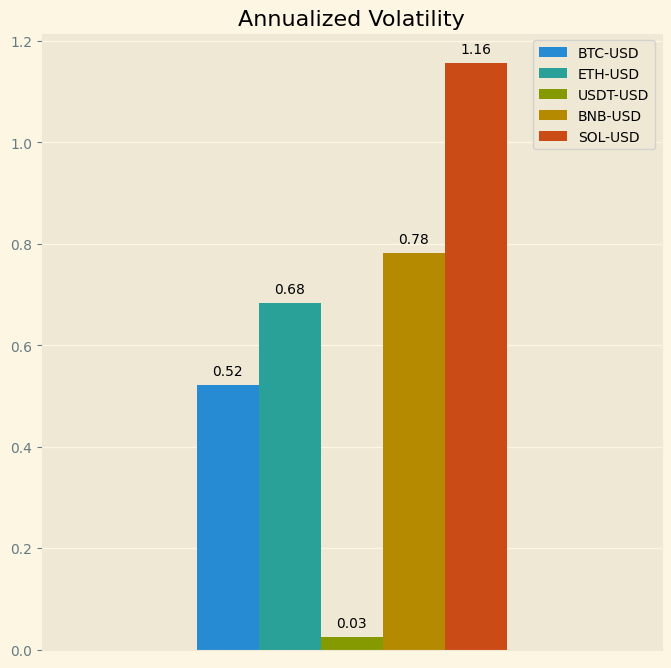

In [ ]:
ax = std_df.plot(kind='bar', title='Annualized Volatility', figsize=(8,8))
for p in ax.patches:
    ax.annotate(text=np.round(p.get_height(), decimals=2),
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xticks([])

### **Sharpe Ratio**

In [ ]:
df = pd.DataFrame()
for ticker in tickers:
  df[ticker] = DATA[ticker]['Close']

df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

df.dropna(inplace=True, axis=0)

([], [])

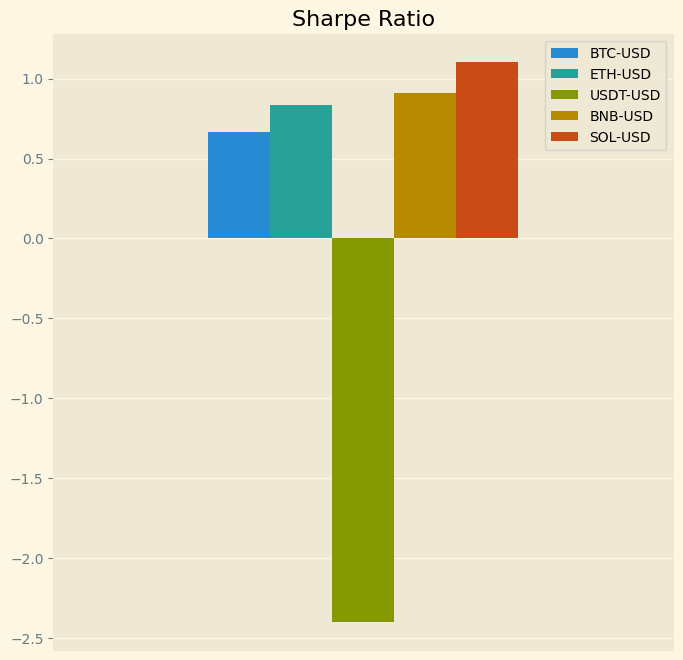

In [ ]:
for ticker in tickers:
  std_df['cagr_' + ticker] = CAGR(df, ticker)[0]

sharpe_df = pd.DataFrame()

for ticker in tickers:
  sharpe_df[ticker] = (std_df['cagr_' + ticker]
                       - treasury_bond_percent) / std_df[ticker]

ax = sharpe_df.plot(kind='bar', title='Sharpe Ratio', figsize=(8,8))
for p in ax.patches:
    ax.annotate(text=np.round(p.get_height(), decimals=2),
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xticks([])

### **Maximum Drawdown**

In [ ]:
df = pd.DataFrame()
for ticker in tickers:
  df[ticker] = DATA[ticker]['Close']

df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

df.dropna(inplace=True, axis=0)


In [ ]:
def Max_Drawdown(df, stock):
  df_copy = df.copy()
  df_copy['return_' + stock] = df_copy[stock].pct_change()
  df_copy['cummulative_return_' + stock] = (1 + df_copy['return_' + stock]).cumprod()
  df_copy['cummulative_roll_max_' + stock] = df_copy['cummulative_return_' + stock].cummax()
  df_copy['drawdown_' + stock] = df_copy['cummulative_roll_max_' + stock] - df_copy['cummulative_return_' + stock]
  maximum_drawdown = (df_copy['drawdown_' + stock] / df_copy['cummulative_roll_max_' + stock]).max()

  return [maximum_drawdown]

([], [])

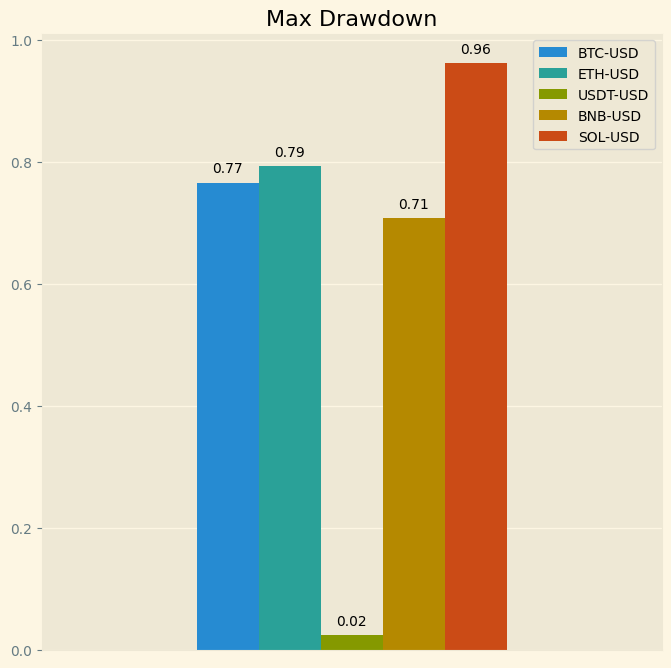

In [ ]:
drawdown_df = pd.DataFrame()
for ticker in tickers:
  drawdown_df[ticker] = Max_Drawdown(df, ticker)

ax = drawdown_df.plot(kind='bar', title='Max Drawdown', figsize=(8,8))
for p in ax.patches:
    ax.annotate(text=np.round(p.get_height(), decimals=2),
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xticks([])

### **Calmar Ratio**

([], [])

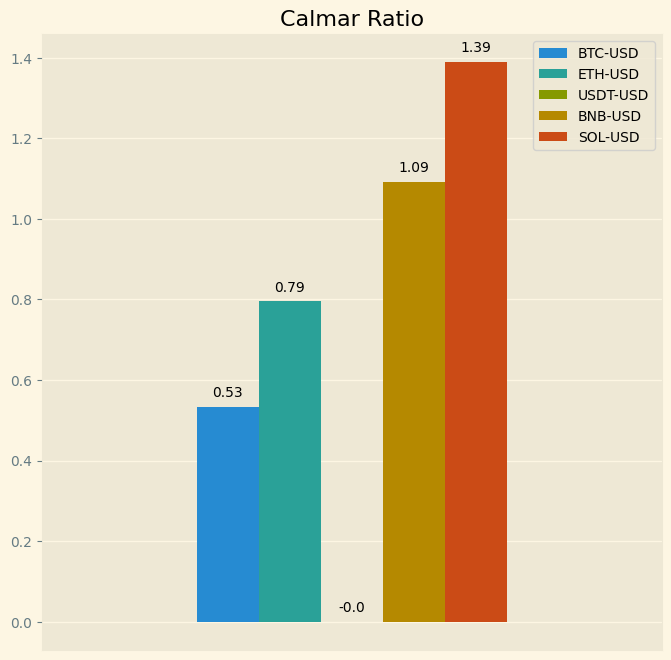

In [ ]:
Calmar_df = pd.DataFrame()

for ticker in tickers:
  Calmar_df[ticker] = CAGR(df, ticker)[0] / drawdown_df[ticker]


ax = Calmar_df.plot(kind='bar', title='Calmar Ratio', figsize=(8,8))
for p in ax.patches:
    ax.annotate(text=np.round(p.get_height(), decimals=2),
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xticks([])